# Introducing Pandas Objects

At the very basic level, Pandas objects can be thought of as **enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.**
As we will see during the course of this chapter, Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but **nearly everything that follows will require an understanding of what these structures are**.
Thus, before we go any further, let's introduce these three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

We will start our code sessions with the standard NumPy and Pandas imports:

In [2]:
import numpy as np
import pandas as pd

## The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [8]:
import pandas as pd
import numpy as np
serie = pd.Series(np.random.randint(1, 11, (1000,)))

<Axes: >

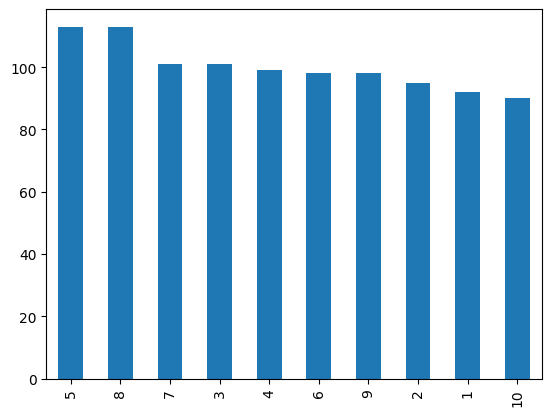

In [11]:
serie.value_counts().plot(kind="bar")

In [32]:
# Heights of class
data = pd.Series([1.5, 1.6, 1.75, 1.80])
pd.concat([data, data]).reset_index(drop=True)

0    1.50
1    1.60
2    1.75
3    1.80
4    1.50
5    1.60
6    1.75
7    1.80
dtype: float64

<Axes: >

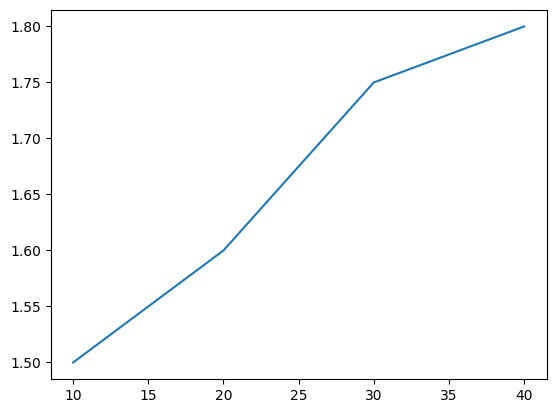

In [25]:
data.plot()

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [33]:
data

0    1.50
1    1.60
2    1.75
3    1.80
dtype: float64

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [22]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [34]:
data.iloc[1]

np.float64(1.6)

In [35]:
data.loc[1]

np.float64(1.6)

In [6]:
otra_serie = data[1:4].copy()
print(otra_serie)

1    1.60
2    1.75
3    1.80
dtype: float64


In [18]:
otra_serie[0:2]

1    1.60
2    1.75
dtype: float64

As we will see, though, **the Pandas ``Series`` is much more general and flexible than the one-dimensional NumPy** array that it emulates.

### ``Series`` as generalized NumPy array

From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array.
**The essential difference is the presence of the index**: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an ***explicitly defined*** index associated with the values.

This explicit index definition gives the ``Series`` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.
For example, **if we wish, we can use strings as an index:**

(np.float64(1.6), np.float64(1.6))

In [38]:
data = pd.Series([1.5, 1.6, 1.75, 1.80],
                 index=['Jane', 'Joe', 'Susan', 'Mike'])
data

Jane     1.50
Joe      1.60
Susan    1.75
Mike     1.80
dtype: float64

In [40]:
data.iloc[1], data.loc["Fede"]

KeyError: 'Fede'

In [22]:
data.values

array([1.5 , 1.6 , 1.75, 1.8 ])

In [23]:
data.index

Index(['Jane', 'Joe', 'Susan', 'Mike'], dtype='object')

And the item access works as expected:

In [24]:
data['Susan']

1.75

We can even use non-contiguous or non-sequential indices:

In [25]:
data = pd.Series([1.5, 1.6, 1.75, 1.80],
                 index=[2, 5, 3, 7])
data

2    1.50
5    1.60
3    1.75
7    1.80
dtype: float64

In [26]:
data[5]

1.6

### Series as specialized dictionary

In this way, you can think of a **Pandas ``Series`` a bit like a specialization of a Python dictionary.**
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [100]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
# print(population_dict)
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [47]:
population.loc["New York"]

np.int64(19651127)

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [48]:
population['California']

np.int64(38332521)

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [54]:
population.iloc[0:3]

California    38332521
Texas         26448193
New York      19651127
dtype: int64

We'll discuss some of the quirks of Pandas indexing and slicing in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb).

### Constructing Series objects

We've already seen a few ways of constructing a Pandas ``Series`` from scratch; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

For example, ``data`` can be a list or NumPy array, in which case ``index`` defaults to an integer sequence:

In [23]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

``data`` can be a scalar, which is repeated to fill the specified index:

In [56]:
pd.Series([5,5], index=[100, 200, 300])

ValueError: Length of values (2) does not match length of index (3)

In [57]:
pd.Series([5,5], index=[100, 200, 300, 400])

ValueError: Length of values (2) does not match length of index (4)

``data`` can be a dictionary, in which ``index`` defaults to the sorted dictionary keys:

In [25]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In each case, the index can be explicitly set if a different result is preferred:

In [26]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

Notice that in this case, the ``Series`` is populated only with the explicitly identified keys.

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be **thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.**
We'll now take a look at each of these perspectives.

### DataFrame as a generalized NumPy array
If a ``Series`` is an analog of a one-dimensional array with flexible indices, a **``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.**
Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a ``DataFrame`` as a sequence of aligned ``Series`` objects.
Here, by "aligned" we mean that **they share the same index.**

To demonstrate this, let's first construct a new ``Series`` listing the area of each of the five states discussed in the previous section:

In [93]:
array = np.arange(1,11).reshape(2, 5)
array[0]

array([1, 2, 3, 4, 5])

In [96]:
df = pd.DataFrame({1:[1,2,3,4], 2: [5,6,7,8]}, index=[1,2,3,4])
df

,1,2
1,1,5
2,2,6
3,3,7
4,4,8


In [98]:
df.loc[4, :].values

array([4, 8])

In [87]:
df.loc[:, "T"]

a    1
b    2
c    3
d    4
Name: T, dtype: int64

In [67]:
df.iloc[0,1]

np.int64(5)

In [69]:
df.loc[0, "b"]

np.int64(5)

In [74]:
df.loc[:, "b"]

,a,b
a,1,5
b,2,6
c,3,7
d,4,8


In [111]:
area_dict = {'Tejas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995, 'California': 423967}
area = pd.Series(area_dict)
area

Tejas         695662
New York      141297
Florida       170312
Illinois      149995
California    423967
dtype: int64

In [107]:
print(area)

California    423967
Tejas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64


Now that we have this along with the ``population`` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [108]:
print(population)

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


In [109]:
print(area)

California    423967
Tejas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64


In [117]:
states = pd.DataFrame({'POPULATION (M)': population,
                       'AREA (sq/m)': area})
states

,POPULATION (M),AREA (sq/m)
California,38332521.0,423967.0
Florida,19552860.0,170312.0
Illinois,12882135.0,149995.0
New York,19651127.0,141297.0
Tejas,NaN,695662.0
Texas,26448193.0,NaN


In [119]:
states.columns = ["population", "area"]

In [123]:
states = states.reset_index()

In [124]:
states.columns = ["city", "population", "area"]
states

,city,population,area
0,California,38332521.0,423967.0
1,Florida,19552860.0,170312.0
2,Illinois,12882135.0,149995.0
3,New York,19651127.0,141297.0
4,Tejas,NaN,695662.0
5,Texas,26448193.0,NaN


Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [36]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [113]:
states.columns

Index(['population', 'area'], dtype='object')

In [38]:
states.values

array([[38332521,   423967],
       [26448193,   695662],
       [19651127,   141297],
       [19552860,   170312],
       [12882135,   149995]], dtype=int64)

**Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.**

### DataFrame as specialized dictionary

Similarly, we can also think of a ``DataFrame`` as a specialization of a dictionary.
Where a dictionary maps a key to a value, a ``DataFrame`` maps a column name to a ``Series`` of column data.
For example, asking for the ``'area'`` attribute returns the ``Series`` object containing the areas we saw earlier:

In [125]:
states.loc[:, 'area']

0    423967.0
1    170312.0
2    149995.0
3    141297.0
4    695662.0
5         NaN
Name: area, dtype: float64

**Notice the potential point of confusion here: in a two-dimesnional NumPy array, ``data[0]`` will return the first *row*. For a ``DataFrame``, ``data['col0']`` will return the first *column*.**
Because of this, it is probably better to think about ``DataFrame``s as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful.
We'll explore more flexible means of indexing ``DataFrame``s in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb).

### Constructing DataFrame objects

A Pandas ``DataFrame`` can be constructed in a variety of ways.
Here we'll give several examples.

#### From a single Series object

A ``DataFrame`` is a collection of ``Series`` objects, and a single-column ``DataFrame`` can be constructed from a single ``Series``:

In [40]:
print(population)

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


In [41]:
pd.DataFrame(data=population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### From a list of dicts

Any list of dictionaries can be made into a ``DataFrame``.
We'll use a simple list comprehension to create some data:

In [42]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
print(data)
pd.DataFrame(data)

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]


,a,b
0,0,0
1,1,2
2,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with ``NaN`` (i.e., "not a number") values:

In [43]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a dictionary of Series objects

As we saw before, a ``DataFrame`` can be constructed from a dictionary of ``Series`` objects as well:

In [127]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [126]:
area

Tejas         695662
New York      141297
Florida       170312
Illinois      149995
California    423967
dtype: int64

In [44]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a ``DataFrame`` with any specified column and index names.
If omitted, an integer index will be used for each:

In [47]:
np.random.seed(10)
np.random.rand(3, 2)

array([[0.77132064, 0.02075195],
       [0.63364823, 0.74880388],
       [0.49850701, 0.22479665]])

In [54]:
np.random.seed(10)
x = pd.DataFrame(np.random.rand(3, 2),
             columns=['Columna_1', 'Columna_2'],
             index=['a', 'b', 'c'])

In [56]:
x.reset_index()

,index,Columna_1,Columna_2
0,a,0.771321,0.020752
1,b,0.633648,0.748804
2,c,0.498507,0.224797


#### From a NumPy structured array

We covered structured arrays in [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb).
A Pandas ``DataFrame`` operates much like a structured array, and can be created directly from one:

In [39]:
import numpy as np
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8'), ('C', 'f8')])
A

array([(0, 0., 0.), (0, 0., 0.), (0, 0., 0.)],
      dtype=[('A', '<i8'), ('B', '<f8'), ('C', '<f8')])

In [40]:
pd.DataFrame(A)

,A,B,C
0,0,0.0,0.0
1,0,0.0,0.0
2,0,0.0,0.0


## The Pandas Index Object

We have seen here that both the ``Series`` and ``DataFrame`` objects contain an explicit *index* that lets you reference and modify data.
This ``Index`` object is an interesting structure in itself, and **it can be thought of either as an *immutable array* or as an *ordered set* (technically a multi-set, as ``Index`` objects may contain repeated values).**
Those views have some interesting consequences in the operations available on ``Index`` objects.
As a simple example, let's construct an ``Index`` from a list of integers:

In [58]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as immutable array

The ``Index`` in many ways operates like an array.
For example, we can use standard Python indexing notation to retrieve values or slices:

In [59]:
ind[1]

3

In [43]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

``Index`` objects also have many of the attributes familiar from NumPy arrays:

In [44]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between ``Index`` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:

In [60]:
ind[1] = 0

TypeError: Index does not support mutable operations

**This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.**

In [130]:
path = r"C:\Users\Ort\Desktop\REPO SEP 24\2-Data_Analysis\2-Pandas\Práctica\1-World_Food_Facts\food_100.csv"
sep = ","
header = 0
index = 0

pd.read_csv(path, sep=sep, header=header, index_col=index)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,34715,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055715,2017-03-09T10:35:15Z,1489055715,2017-03-09T10:35:15Z,Organic Pecan Halves,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,34784,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489138485,2017-03-10T09:34:45Z,1489138485,2017-03-10T09:34:45Z,Unsalted Dry Roasted Almonds,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,34791,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055720,2017-03-09T10:35:20Z,1489055720,2017-03-09T10:35:20Z,Organic Raw Pumpkin Seeds,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
98,35071,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489138484,2017-03-10T09:34:44Z,1489138484,2017-03-10T09:34:44Z,Organic Extra Virgin Olive Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
path = r"C:\Users\Ort\Desktop\REPO SEP 24\2-Data_Analysis\2-Pandas\Práctica\1-World_Food_Facts\food_100.csv"
sep = ","
header = 0
index = 0

df = pd.read_csv(path, sep=sep, header=header, index_col=index)

In [133]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df.shape

(100, 163)

In [136]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=163)

In [137]:
df.describe()

,code,created_t,last_modified_t,generic_name,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,100.00000,1.000000e+02,1.000000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37.000000,37.000000,0.0,0.0
mean,25243.92000,1.488157e+09,1.488157e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.108108,9.108108,NaN,NaN
std,8257.77455,6.895563e+06,6.895160e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.628155,6.628155,NaN,NaN
min,3087.00000,1.434531e+09,1.434536e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-6.000000,-6.000000,NaN,NaN
25%,18367.50000,1.489056e+09,1.489056e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000,NaN,NaN
50%,28621.50000,1.489056e+09,1.489056e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,11.000000,NaN,NaN
75%,33326.75000,1.489056e+09,1.489056e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,14.000000,NaN,NaN
max,35170.00000,1.502444e+09,1.502444e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,26.000000,NaN,NaN


In [144]:
df.loc[:, "creator"].value_counts()

creator
usda-ndb-import               94
chris13                        2
openfoodfacts-contributors     1
date-limite-app                1
canieatthis-app                1
tacinte                        1
Name: count, dtype: int64

In [141]:
df.loc[:, "product_name"].value_counts()

product_name
Farine de blé noir                1
Banana Chips Sweetened (Whole)    1
Peanuts                           1
Organic Salted Nut Mix            1
Organic Polenta                   1
                                 ..
Organic Pecan Halves              1
Unsalted Dry Roasted Almonds      1
Organic Raw Pumpkin Seeds         1
Organic Extra Virgin Olive Oil    1
Liquid Aminos                     1
Name: count, Length: 99, dtype: int64

In [145]:
df.loc[:, "creator"].value_counts()

creator
usda-ndb-import               94
chris13                        2
openfoodfacts-contributors     1
date-limite-app                1
canieatthis-app                1
tacinte                        1
Name: count, dtype: int64

In [148]:
mask = df.loc[:, "creator"] != "usda-ndb-import"

In [150]:
df.loc[    mask   ,    ["url", "creator", "code"]  ]

,url,creator,code
0,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,3087
46,http://world-en.openfoodfacts.org/product/0000...,chris13,20114
47,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,24600
48,http://world-en.openfoodfacts.org/product/0000...,canieatthis-app,27083
49,http://world-en.openfoodfacts.org/product/0000...,tacinte,27205
51,http://world-en.openfoodfacts.org/product/0000...,chris13,30113
